# import libraries

In [102]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# load dataset

In [103]:
df=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\data science\datasets\insurance.csv')
print('success')

success


In [104]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Here the target value is the charges

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check for unique values

In [106]:
unique_vals = df['sex'].value_counts()
print(unique_vals)

male      676
female    662
Name: sex, dtype: int64


In [107]:
df.shape

(1338, 7)

In [108]:
unique_vals = df['smoker'].value_counts()
print(unique_vals)

no     1064
yes     274
Name: smoker, dtype: int64


In [109]:
unique_vals = df['region'].value_counts()
print(unique_vals)

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


# Calculate mean of charges

In [110]:
df['charges'].mean()

13270.422265141257

# Plot graph bmi and age vs charges

Text(0, 0.5, 'Charges')

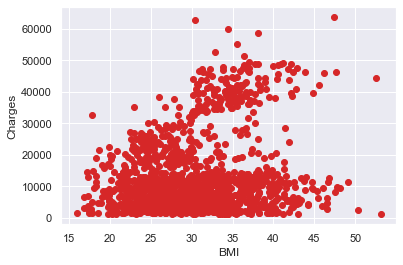

In [111]:
plt.scatter(x=df['bmi'],y=df['charges'],color='#d62728')
plt.xlabel("BMI")
plt.ylabel("Charges")

Text(0, 0.5, 'Charges')

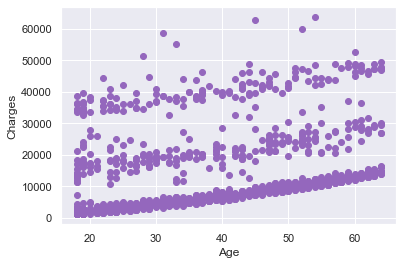

In [112]:
plt.scatter(x=df['age'],y=df['charges'],color='#9467bd')
plt.xlabel("Age")
plt.ylabel("Charges")

# Box plot

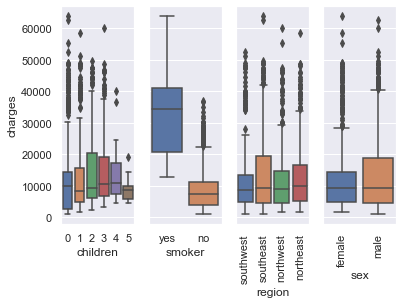

In [113]:
fig, axes = plt.subplots(1,4,sharey=True) #We will plot children, smoker, region, sex; 

plot_children = sns.boxplot(y= 'charges', x="children", data=df,  orient='v' , ax=axes[0])
plot_smoker = sns.boxplot(y= 'charges',x="smoker", data=df,  orient='v' , ax=axes[1])
plot_region = sns.boxplot(y= 'charges',x="region", data=df,  orient='v' , ax=axes[2])
plot_sex = sns.boxplot(y= 'charges',x="sex", data=df,  orient='v' , ax=axes[3])
plot_region.set_xticklabels(labels=df['region'].unique(),rotation = 90)
plot_sex.set_xticklabels(labels=df['sex'].unique(),rotation = 90)
for i in axes[1:4]:
    i.set_ylabel('')   
    
plt.show()


# Function for mean and SD

In [114]:
def mean_and_sd(indep_var):
    val1 = df[indep_var].unique()[0]
    val2 = df[indep_var].unique()[1]
    var1 = df[df[indep_var] == val1]['charges']
    mean1 = round(var1.mean(),2)
    var2 = df[df[indep_var] == val2]['charges']
    mean2 = round(var2.mean(),2)
    print('{} mean - {} mean = {}'.format(val1,val2,mean1 - mean2))
    
    #Standard Deviation
    sd1 = np.std(df[df[indep_var] == val1]['charges'])
    sd2 = np.std(df[df[indep_var] == val2]['charges'])
    print('sd of {} is {}, and of {} is {}'.format(val1,round(sd1),val2,round(sd2)))

In [115]:
mean_and_sd('smoker')

yes mean - no mean = 23615.96
sd of yes is 11520, and of no is 5991


In [116]:
mean_and_sd('sex')

female mean - male mean = -1387.17
sd of female is 11120, and of male is 12961


# Encode categorical features by onehot encoding, lable encoding can also be used

In [117]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')

var1 = onehotencoder.fit_transform(df.region.values.reshape(-1,1)).toarray()
var1 = pd.DataFrame(var1)
var1.columns = ['region_1', 'region_2', 'region_3', 'region_4']
var1 = var1.iloc[:,0:3]
df = pd.concat([df, var1], axis=1)

onehotencoder = OneHotEncoder(categories='auto')
var3 = onehotencoder.fit_transform(df.smoker.values.reshape(-1,1)).toarray()
var3 = pd.DataFrame(var3)
var3.columns = ['smoker_1', 'smoker_2']
var3 = var3.iloc[:,0]
df = pd.concat([df, var3], axis=1)
df = df.drop(columns = ['region','sex','smoker'])


In [118]:
df.head(5)

,age,bmi,children,charges,region_1,region_2,region_3,smoker_1
0,19,27.900,0,16884.92400,0.0,0.0,0.0,0.0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,1.0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,1.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,1.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,1.0


In [119]:
df = df[['age', 'bmi', 'children', 'region_1', 'region_2', 'region_3','smoker_1', 'charges']]
df

,age,bmi,children,region_1,region_2,region_3,smoker_1,charges
0,19,27.900,0,0.0,0.0,0.0,0.0,16884.92400
1,18,33.770,1,0.0,0.0,1.0,1.0,1725.55230
2,28,33.000,3,0.0,0.0,1.0,1.0,4449.46200
3,33,22.705,0,0.0,1.0,0.0,1.0,21984.47061
4,32,28.880,0,0.0,1.0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,0.0,1.0,10600.54830
1334,18,31.920,0,1.0,0.0,0.0,1.0,2205.98080
1335,18,36.850,0,0.0,0.0,1.0,1.0,1629.83350
1336,21,25.800,0,0.0,0.0,0.0,1.0,2007.94500


# Split dataset into test and train 

In [120]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:7]
Y = df.iloc[:,7]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [121]:
print((x_train.shape,x_test.shape,y_train.shape,y_test.shape))

((1003, 7), (335, 7), (1003,), (335,))


# Fix the dimesions 

In [122]:
y_train = np.array(y_train).reshape(-1, 1)
y_train = pd.DataFrame(y_train)
y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)

In [123]:
print((x_train.shape,x_test.shape,y_train.shape,y_test.shape))

((1003, 7), (335, 7), (1003, 1), (335, 1))


# Preform liner regression

In [124]:
#linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
lr_pred = reg.predict(x_test)
print(reg.coef_)

[[ 2.60642999e+02  3.29874669e+02  5.92234730e+02  8.45480348e+02
   8.89605021e+02  4.60105170e+00 -2.38553573e+04]]


In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_pred,y_test)

34369516.07026162

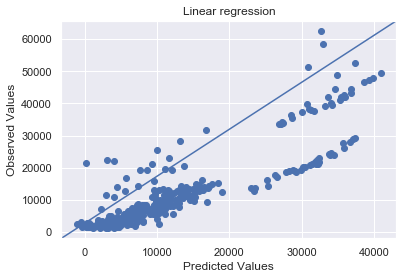

In [136]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)
plt.scatter(lr_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.title('Linear regression')
plt.show()

# Evaluate the Model using R^2 

In [133]:
#model evaluation
r2_lr = r2_score(y_test, lr_pred)
mae_lr = mean_absolute_error(y_test, lr_pred) #mean absolute error
mse_lr = mean_squared_error(y_test, lr_pred)  #MSE
print([r2_lr, mae_lr, mse_lr])

[0.7623904380199404, 3982.8411422914937, 34369516.07026162]


Using liner regression model gives 76% accuracy 

# Using Polynomial regression  

In [134]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

X = df[['age','bmi','children','smoker_1']] #drop the region columns
Y = df.iloc[:,7]

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)
print((X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))



((1003, 15), (335, 15), (1003,), (335,))


In [129]:
Y_train = np.array(Y_train).reshape(-1, 1)
Y_train = pd.DataFrame(Y_train)
Y_test = np.array(Y_test).reshape(-1, 1)
Y_test = pd.DataFrame(Y_test)
print((X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))

((1003, 15), (335, 15), (1003, 1), (335, 1))


In [130]:
plr = LinearRegression().fit(X_train,Y_train)
Y_test_pred = plr.predict(X_test)


In [131]:
#model evaluation
r2_lr = r2_score(Y_test_pred, Y_test)
print([r2_lr])

[0.868965150444603]


Using Polynimial regression model gives 86% accuracy

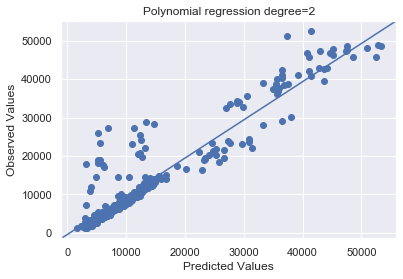

In [138]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(Y_test_pred, Y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.title('Polynomial regression degree=2')
plt.show()